In [2]:
# import library
from sklearn import svm
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt # For plotting
import numpy as np
import pandas as pd
import seaborn as sns # For Plotting

In [3]:
df = pd.read_csv("datas/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Remove ID
df = df.iloc[:,1:]
df.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [5]:
# Check the shape
df.shape

(150, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
# We can see No Null and data type
df.isnull().sum(axis=0)

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [13]:
# Shuffle the data
df = df.sample(frac = 1)

In [15]:
df.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
75,6.6,3.0,4.4,1.4,Iris-versicolor
60,5.0,2.0,3.5,1.0,Iris-versicolor


In [16]:
#  Split the data in to train and Test
train,test = train_test_split(df,test_size = 0.4)
# 20% for test and 20 for validation

In [18]:
# Again split data sets to validation and test data sets
test_df, valid_df = train_test_split(test, test_size = 0.5)

In [19]:
print(train.shape)
print(test.shape)
print(valid_df.shape)
print(test_df.shape)

(90, 5)
(60, 5)
(30, 5)
(30, 5)


In [37]:
train_stats = train.describe()
#train_stats.pop("Species")
train_stats

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,90.000000,90.000000,90.000000,90.000000
mean,5.953333,3.031111,4.017778,1.310000
std,0.800309,0.436442,1.666226,0.732557
min,4.400000,2.000000,1.000000,0.100000
25%,5.400000,2.800000,2.100000,0.700000
50%,5.900000,3.000000,4.450000,1.400000
75%,6.400000,3.375000,5.100000,1.875000
max,7.900000,4.200000,6.900000,2.500000


In [23]:
# Extract y i.e Species
#train_stats.pop("target")

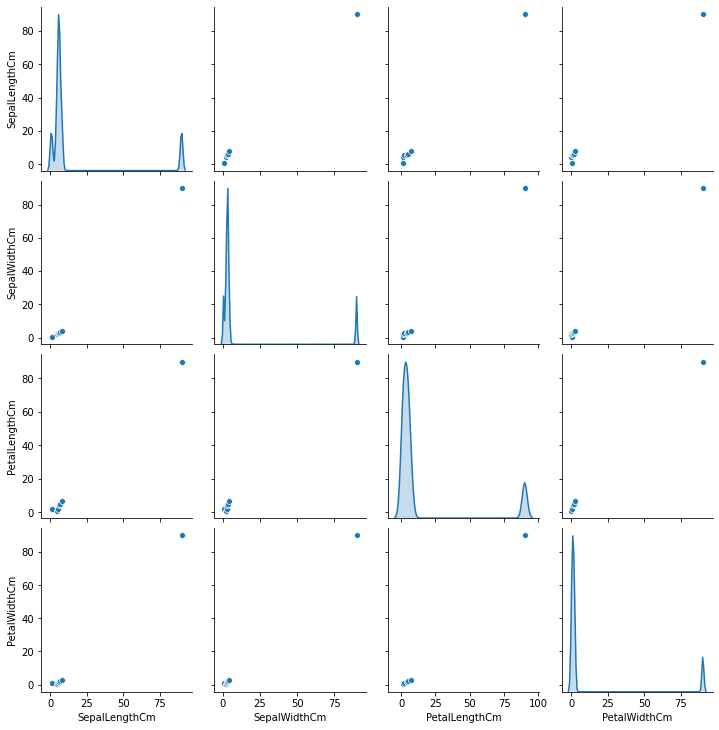

In [24]:
sns.pairplot(train_stats[train_stats.columns], diag_kind = "kde")


In [25]:
# label or Y value
y_train = train.pop("Species")
y_test = test_df.pop("Species")
y_valid = valid_df.pop("Species")

## Normalize the Data
## or Scalling the data
#### Subtract the mean of the training data and divide by the standard deviation of the training data.

In [40]:
# def the Function to normalize the data sets
def norm(x):
    return (x - train_stats.loc["mean"]) / train_stats.loc["std"]

In [39]:
train_stats.loc["mean"]

SepalLengthCm    5.953333
SepalWidthCm     3.031111
PetalLengthCm    4.017778
PetalWidthCm     1.310000
Name: mean, dtype: float64

In [56]:
normed_train_df = norm(train)
normed_test_df = norm(test_df)
normed_valid_df = norm(valid_df)

In [43]:
normed_train_df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
96,-0.316544,-0.300409,0.109362,-0.013651
67,-0.191593,-0.758659,0.049346,-0.423175
129,1.557732,-0.071283,1.069616,0.395873
17,-1.066255,1.074343,-1.571082,-1.378731
75,0.808021,-0.071283,0.229394,0.122857
82,-0.191593,-0.758659,-0.070685,-0.150159
7,-1.191207,0.845218,-1.511066,-1.515239
50,1.307828,0.386967,0.409442,0.122857
111,0.558118,-0.758659,0.769537,0.805398
12,-1.441110,-0.071283,-1.571082,-1.651748


### Training The Model

In [49]:
model = svm.SVC(C = 1, #reg parameter
               kernel = "linear" # kernel "linear","poly",
               # "rbf", "sigmoid","precomputed",default = "rbf"
               ) ## linear Kernel

# Train the Model using the training sets
model.fit(normed_train_df, y_train)

# Predict the response for test datasets
y_predict = model.predict(normed_test_df)

In [50]:
example_batch = normed_test_df[:10]
example_result = model.predict(example_batch)
print("Predicted Values")
example_result

Predicted Values


array(['Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa'], dtype=object)

### See how the training went

In [51]:
from sklearn import metrics
y_pred = model.predict(normed_train_df)
print("Accuracy",metrics.accuracy_score(y_train,y_pred))

Accuracy 0.9888888888888889


In [57]:
y_pred = model.predict(normed_valid_df)
print("Accuracy ", metrics.accuracy_score(y_valid, y_predict))

Accuracy  0.2


In [53]:
# In the validation there is some Errror
# I will fixed later

In [55]:
y_pred= model.predict(normed_test_df)
print("Accuracy ", metrics.accuracy_score(y_test, y_pred))

Accuracy  1.0


Text(0.5, 1.0, 'Confusion Matrix')

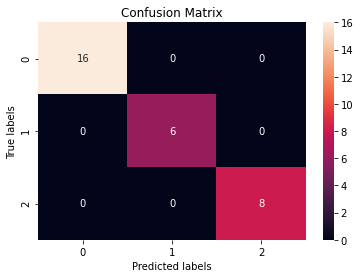

In [61]:
from sklearn.metrics import confusion_matrix

ax = plt.subplot()
predict_results = model.predict(normed_test_df)
cm = confusion_matrix(predict_results,predict_results)
sns.heatmap(cm,annot = True, ax =ax) 
# Annotate True to annotate cells
# Labels, title, and ticks
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")